In [1]:
! pip install geopandas
! pip install kaggle --upgrade

     |████████████████████████████████| 921kB 2.7MB/s 
     |████████████████████████████████| 10.1MB 35.2MB/s 
     |████████████████████████████████| 11.9MB 28.8MB/s 
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=6614 sha256=032db04ef7f03b8a80769d281aea53066ba524a3f0eba3d51a380c89de07f2c8
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch
Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


Download kaggle.json and Put on My Drive/.kaggle in Google Drive

In [0]:
config_path = '/content/drive'
dataset = 'alexisbcook/geospatial-learn-course-data'
data_path = '/content/datasets/' + dataset

In [3]:
from google.colab import drive
drive.mount(config_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
!kaggle config set -n path -v "{config_path}/My Drive"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 6, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [5]:
!kaggle datasets download {dataset} -p "{data_path}" --unzip

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 6, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [0]:
import geopandas as gpd

In [7]:
loans_filepath = data_path + "/kiva_loans/kiva_loans/kiva_loans.shp"

world_loans = gpd.read_file(loans_filepath)

DriverError: ignored

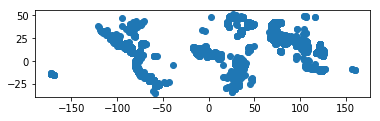

In [0]:
world_loans.plot()